In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
np.random.seed(23)

# the variable 'now' references the datetime that the data was saved and is referenced 
# in other notebooks so that the correct version of the cleaned data is called
now = '2020-07-07-09-58'
%store now

Stored 'now' (str)


## Data Preprocessing

### The data set with the genders of music artists

The file singers_gender.csv is from Kaggle and lists music artists and their gender: 

https://www.kaggle.com/rkibria/singersgender 

This csv file containing the name and gender of singers was used to scrape genre metadata for each artist from Wikipedia and stored in the csv file here: 

'../../data/genre_lists/data_to_be_cleaned/wiki-kaggle_genres_rescrape.csv/wiki-kaggle_genres_rescrape.csv'

### We next clean the data. This involves 
- removing artists for which no genre information was obtained
- removing bands (which do not have a singular gender)
- correcting spelling irregularities for names of genres (sometimes referred to as genre labels)
- normalizing and aggregating genres
- organizing genres into a list (in the csv this is a string, but in the data frame it is a list)

The 'cleaning' process also involved making calls about which genre labels should be considered spelling variants of a single genre. For example, 'rock n roll' and 'rock and roll' were aggregated into a single genre, but kept separate from 'rock'. The labels 'r & b' and 'r n b' were combined but kept separarte from 'rhythm and blues'.

In addition to cleaning the data, a new column is added with the number of genres for each artist.

In [2]:
from genre_scripts.genre_cleaning import clean_genre_data

In [3]:
data = clean_genre_data()

In [4]:
data.head()

,artist,gender,genrelist,genrelist_length
1,Christopher_Willits,male,"[electronic, glitch, ambient, electro_acoustic...",5
3,Shawn_Hook,male,"[pop, electronic, rock]",3
4,Steve_Poltz,male,"[pop_rock, indie_rock, folk_rock]",3
6,Marvin_Isley,male,"[r_and_b, funk, soul, funk_rock]",4
7,Povel_Ramel,male,[vaudeville],1


### Export the cleaned data set:

In [5]:
# today = datetime.today()
# now = today.strftime('%Y-%m-%d-%H-%M')

In [6]:
# data.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_genres_gender_cleaned_{}.csv'.format(now))

### Extract the list of unique genres:

In [7]:
genre_list = data.genrelist.values.tolist()
genre_list = [x for y in genre_list for x in y]
genre_list = list(set(genre_list))
genre_list = sorted(genre_list)

### Export the list of genres:

In [8]:
# genre_list_df = pd.DataFrame({'genre_list':genre_list})
# genre_list_df.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/genre_list_{}.csv'.format(now))

### Create the train test split

This train-test split will be used for ML modeling. 

In [9]:
data = pd.read_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_genres_gender_cleaned_2020-07-07-09-58.csv', index_col = ['artist'])
data.drop(['Unnamed: 0'], axis = 1,  inplace = True)

X = data[['genrelist', 'genrelist_length']]
y = data.gender

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# # export for further use
# X_train.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_train_{}.csv'.format(now))
# y_train.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_train_{}.csv'.format(now))

# X_test.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_test_{}.csv'.format(now))
# y_test.to_csv('/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_test_{}.csv'.format(now))

## The basic shape of the data

report basic stats

## Gender bias in the length of genre lists of artists

How does genre list length depend on gender?

Split the genre lists into two bins: those with length $\leq 5$ and those with length $\geq 6$. For each bin, calculate

$$\frac{\text{actual # of male artists in bin}}{\text{expected # of male artists in bin}}$$

where the expected number of male artists in a bin is ${(\% \text{male in total sample)} \cdot \text{(total in bin)}}$. Do the same for female artists. This gives a measure of bias. 

We find that for genre list lengths $\leq 5$, the ratio is close to $1$ for male and female artists. However, for list lengths $\geq 6$, male artists are over represented and female artists are under represented.


In [10]:
from genre_scripts.genre_list_length_bias import generate_bias_plots

In [11]:
fig_paths, fig_means, fig_means_select = generate_bias_plots()

The significance of the geometry of the paths is that the bias for f/m with >5 labels is safely away from 1.0 even when only half of the data is used and that the paths oscillate around a line of zero slope. If they oscillated around a curve that had non-zero slope at the full data set, that would have suggested that the data had not captured the full distribution. The convergence to the same point is of no significance: at (12376, the full data set) all paths use the same data for the bias estimate.

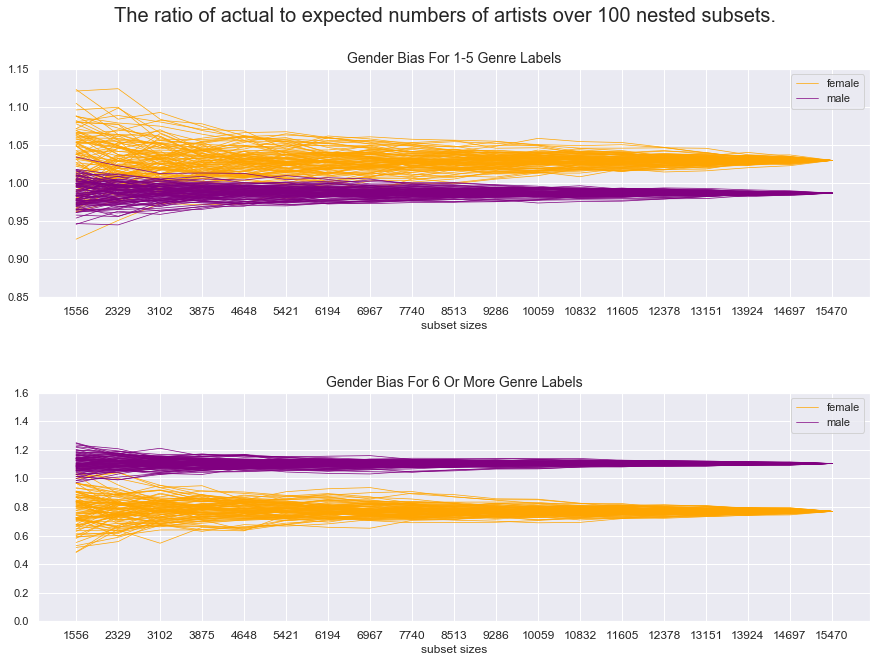

In [12]:
fig_paths

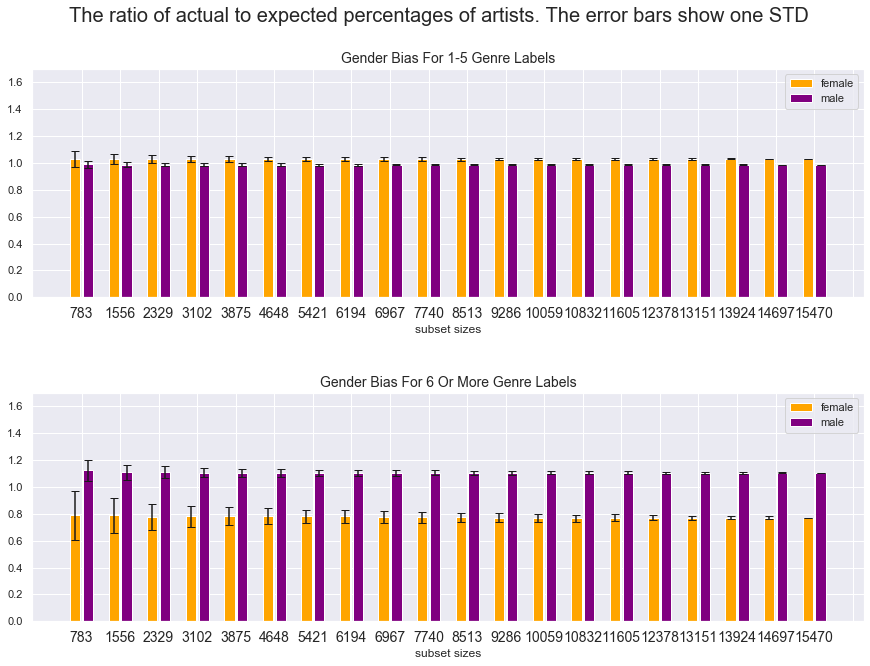

In [13]:
fig_means

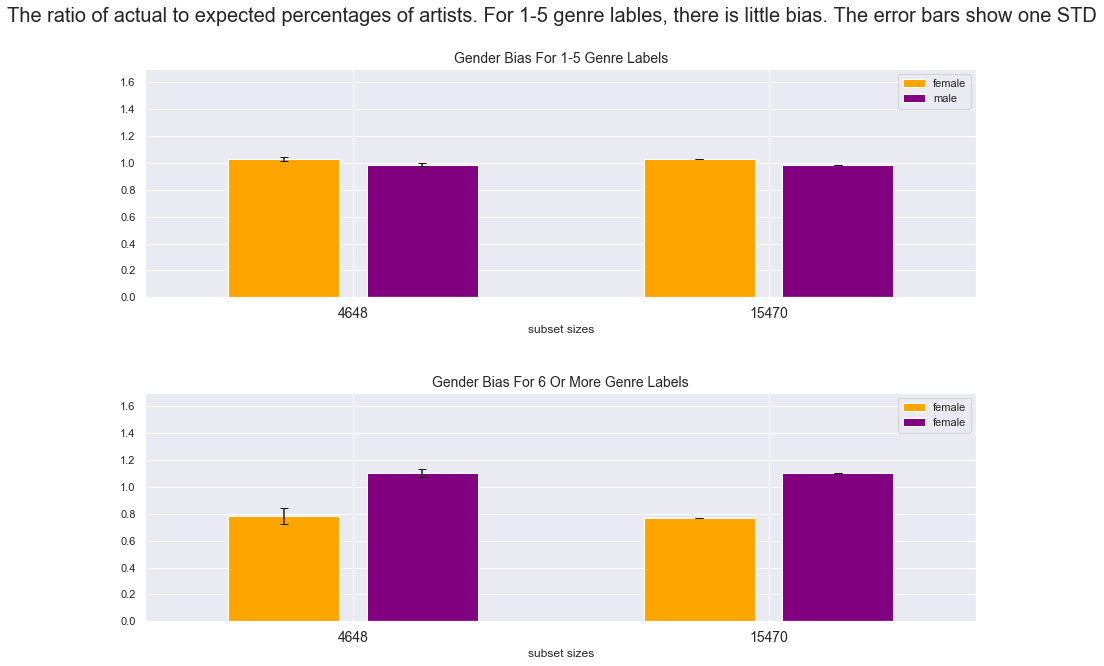

In [14]:
fig_means_select

### Summary

